# Investigate Hotel Business using Data Visualization

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [68]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

### Handle data null

In [69]:
df['children'] = df['children'].fillna(0).astype(int)
df['city'] = df['city'].fillna(0).astype(str)
df['agent'] = df['agent'].fillna(0).astype(int)
df['company'] = df['company'].fillna(0).astype(int)

In [70]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

#### Replace the values ​​that don't match

In [71]:
# Displays a unique value in a specified column
unique_values = df['meal'].unique()
print(unique_values)

['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']


In [72]:
# Replace the values ​​that don't match
df['meal'].replace('Undefined', 'Lunch', inplace=True)

In [73]:
unique_values = df['meal'].unique()
print(unique_values)

['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Lunch']


#### Remove unnecessary data

In [74]:
# Count the total number of guests
df["total_guest"] = df["adults"] + df["children"]

# Displays a data set with a column for the total number of guests
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [75]:
# Filter data based on the total number of guests
df_filtered = df[df["total_guest"] >= 5]

# Displays the dataset after filtering
df_filtered

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
201,Resort Hotel,0,8,2017,September,28,7,0,4,3,...,No Deposit,240,0,0,Personal,193.00,0,1,Check-Out,5
328,Resort Hotel,1,55,2017,September,29,12,4,10,2,...,No Deposit,8,0,0,Contract,133.16,0,1,No-Show,12
1539,Resort Hotel,1,304,2017,November,36,3,0,3,40,...,No Deposit,0,0,0,Bussiness,0.00,0,0,Canceled,40
1587,Resort Hotel,1,333,2017,November,36,5,2,5,26,...,No Deposit,96,0,0,Bussiness,0.00,0,0,Canceled,26
1643,Resort Hotel,1,336,2017,November,37,7,1,2,50,...,No Deposit,0,0,0,Bussiness,0.00,0,0,Canceled,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118557,City Hotel,0,6,2019,October,34,21,1,0,2,...,No Deposit,7,0,0,Personal,264.44,0,2,Check-Out,5
118852,City Hotel,0,215,2019,October,34,25,0,1,2,...,No Deposit,14,0,0,Personal,245.00,0,1,Check-Out,5
118913,City Hotel,0,200,2019,October,34,25,0,2,3,...,No Deposit,0,0,0,Personal,294.00,1,0,Check-Out,5
119054,City Hotel,0,8,2019,October,34,26,2,1,2,...,No Deposit,7,0,0,Personal,253.51,0,2,Check-Out,5


In [76]:
# Saving the dataset after filtering
df_filtered.to_csv("dataset_terfilter.csv", index=False)  # Save filtered dataset with file name "dataset_terfilter.csv"

In [77]:
df_filtered.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
201,Resort Hotel,0,8,2017,September,28,7,0,4,3,...,No Deposit,240,0,0,Personal,193.00,0,1,Check-Out,5
328,Resort Hotel,1,55,2017,September,29,12,4,10,2,...,No Deposit,8,0,0,Contract,133.16,0,1,No-Show,12
1539,Resort Hotel,1,304,2017,November,36,3,0,3,40,...,No Deposit,0,0,0,Bussiness,0.00,0,0,Canceled,40
1587,Resort Hotel,1,333,2017,November,36,5,2,5,26,...,No Deposit,96,0,0,Bussiness,0.00,0,0,Canceled,26
1643,Resort Hotel,1,336,2017,November,37,7,1,2,50,...,No Deposit,0,0,0,Bussiness,0.00,0,0,Canceled,50


#### an aggregate table that shows a comparison of the number of hotel bookings each month based on the type of hotel

In [78]:
df_filtered['arrival_date_month'] = pd.to_datetime(df_filtered['arrival_date_month'], format='%B')
df_filtered['year'] = df_filtered['arrival_date_year']
df_filtered['year_month'] = df_filtered['year'].map(str) + '-' + df_filtered['arrival_date_month'].dt.strftime('%m')
result = df_filtered.groupby(['hotel', 'year_month']).size().reset_index(name='order_amount')


result

<ipython-input-78-d23fdf23e8b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['arrival_date_month'] = pd.to_datetime(df_filtered['arrival_date_month'], format='%B')
<ipython-input-78-d23fdf23e8b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['arrival_date_year']
<ipython-input-78-d23fdf23e8b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,hotel,year_month,order_amount
0,City Hotel,2017-10,1
1,City Hotel,2017-12,1
2,City Hotel,2018-04,2
3,City Hotel,2018-05,1
4,City Hotel,2018-07,1
5,City Hotel,2018-09,8
6,City Hotel,2018-10,7
7,City Hotel,2018-12,1
8,City Hotel,2019-03,3
9,City Hotel,2019-04,9


#### Data normalization and data sequencing by month

In [79]:
min_value = df_filtered['total_guest'].min()
max_value = df_filtered['total_guest'].max()
df_filtered['total_order_normalized'] = (df_filtered['total_guest'] - min_value) / (max_value - min_value)

# Sort data by month
df_sorted = df_filtered.sort_values('year_month')

df_sorted[['hotel', 'year_month', 'total_guest', 'total_order_normalized']]


<ipython-input-79-42b50e683cc7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_order_normalized'] = (df_filtered['total_guest'] - min_value) / (max_value - min_value)


,hotel,year_month,total_guest,total_order_normalized
18745,Resort Hotel,2017-01,5,0.00
19022,Resort Hotel,2017-02,5,0.00
201,Resort Hotel,2017-09,5,0.00
328,Resort Hotel,2017-09,12,0.14
15370,Resort Hotel,2017-09,5,0.00
...,...,...,...,...
39265,Resort Hotel,2019-10,5,0.00
39808,Resort Hotel,2019-10,5,0.00
119054,City Hotel,2019-10,5,0.00
118241,City Hotel,2019-10,5,0.00


## Visualization

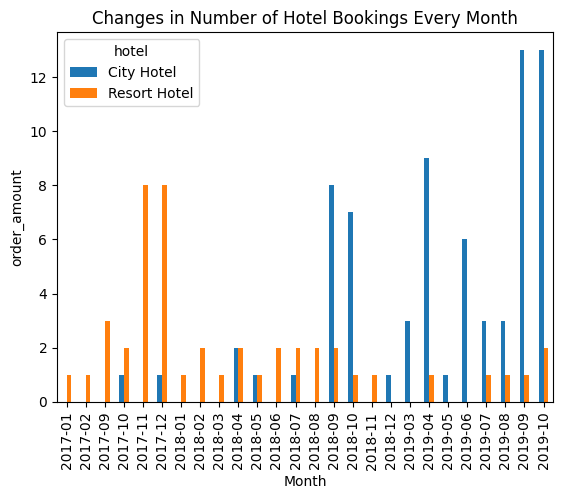

In [80]:
# Pivot table to prepare data for plots
pivot_table = result.pivot(index='year_month', columns='hotel', values='order_amount')

# Create bar plots
pivot_table.plot(kind='bar')

# Set labels and titles on plots
plt.xlabel('Month')
plt.ylabel('order_amount')
plt.title('Changes in Number of Hotel Bookings Every Month')

# Display plots
plt.show()

#### Total duration of stay

In [81]:
df_filtered['total_duration'] = df_filtered['stays_in_weekend_nights'] + df_filtered['stays_in_weekdays_nights']
df_filtered[['stays_in_weekend_nights', 'stays_in_weekdays_nights', 'total_duration']]


<ipython-input-81-c57c1d33d5af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['total_duration'] = df_filtered['stays_in_weekend_nights'] + df_filtered['stays_in_weekdays_nights']


,stays_in_weekend_nights,stays_in_weekdays_nights,total_duration
201,0,4,4
328,4,10,14
1539,0,3,3
1587,2,5,7
1643,1,2,3
...,...,...,...
118557,1,0,1
118852,0,1,1
118913,0,2,2
119054,2,1,3


#### Group the values ​​from the new column in the previous step to make them more significant

In [82]:
# Create categories for grouping
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

# Create labels for each category
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14', '14-16', '16-18', '18-20', '20-22', '22-24']

# Groups 'total_duration' values ​​into predefined categories
df_filtered['duration_category'] = pd.cut(df_filtered['total_duration'], bins=bins, labels=labels, right=False)

# Show data with new column 'duration_category'
df_filtered[['total_duration', 'duration_category']]

<ipython-input-82-ad90ac31d8d8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['duration_category'] = pd.cut(df_filtered['total_duration'], bins=bins, labels=labels, right=False)


,total_duration,duration_category
201,4,4-6
328,14,14-16
1539,3,2-4
1587,7,6-8
1643,3,2-4
...,...,...
118557,1,0-2
118852,1,0-2
118913,2,2-4
119054,3,2-4


 #### an aggregate table that shows the ratio of the number of canceled hotel bookings to the duration of stay for each type of hotel

In [83]:
cancel_df = df_filtered.groupby(['hotel', 'duration_category'])['is_canceled'].sum().reset_index()
total_df = df_filtered.groupby(['hotel', 'duration_category']).size().reset_index(name='total_bookings')
result = pd.merge(cancel_df, total_df, on=['hotel', 'duration_category'])
result['cancellation_ratio'] = result['is_canceled'] / result['total_bookings']


result

,hotel,duration_category,is_canceled,total_bookings,cancellation_ratio
0,City Hotel,0-2,2,12,0.166667
1,City Hotel,2-4,10,37,0.270270
2,City Hotel,4-6,4,17,0.235294
3,City Hotel,6-8,2,7,0.285714
4,City Hotel,8-10,0,0,NaN
5,City Hotel,10-12,0,0,NaN
6,City Hotel,12-14,0,0,NaN
7,City Hotel,14-16,0,0,NaN
8,City Hotel,16-18,0,0,NaN
9,City Hotel,18-20,0,0,NaN


## Visualization

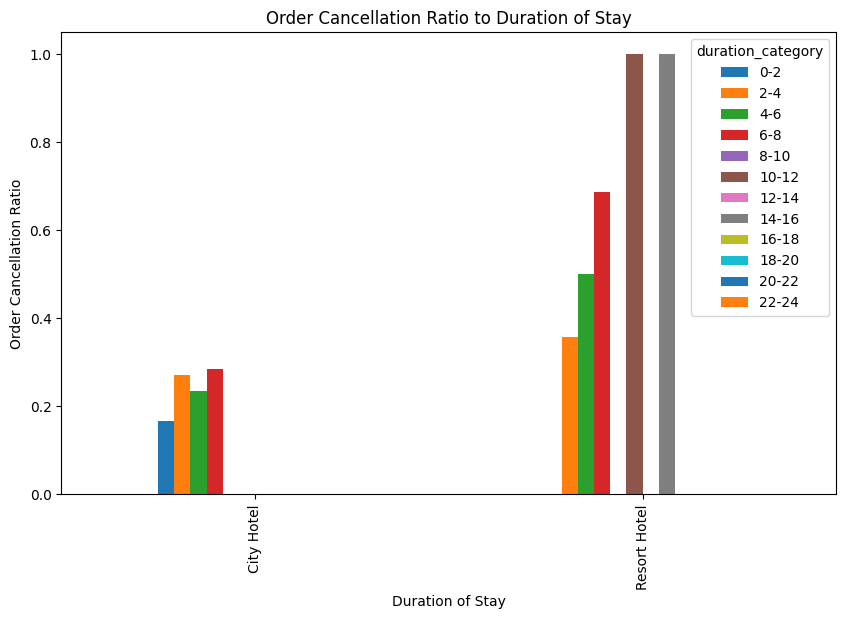

In [84]:
# Group data by type of hotel and category of duration of stay
grouped_df = result.groupby(['hotel', 'duration_category'])['cancellation_ratio'].mean().unstack()
# Draw bar plots
grouped_df.plot(kind='bar', figsize=(10, 6))

# Add axis titles and labels
plt.title('Order Cancellation Ratio to Duration of Stay')
plt.xlabel('Duration of Stay')
plt.ylabel('Order Cancellation Ratio')

# Display plots
plt.show()


#### a new column that contains the categorization of the ordering time interval column

In [85]:
# Specify the interval or deadline for ordering
intervals = [0, 7, 14, 30, np.inf]

# Defines a label for each interval
labels = ['20-29 days', '30-39 days', '40-49 days', '31+ days']

# Created a new column 'booking_interval_category' based on column 'lead_time'
df_filtered['booking_interval_category'] = pd.cut(df_filtered['lead_time'], bins=intervals, labels=labels, right=False)

# Displays data after adding a new column
df_filtered[['lead_time', 'booking_interval_category']]


<ipython-input-85-aa6fdce8515d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['booking_interval_category'] = pd.cut(df_filtered['lead_time'], bins=intervals, labels=labels, right=False)


,lead_time,booking_interval_category
201,8,30-39 days
328,55,31+ days
1539,304,31+ days
1587,333,31+ days
1643,336,31+ days
...,...,...
118557,6,20-29 days
118852,215,31+ days
118913,200,31+ days
119054,8,30-39 days


#### an aggregate table that shows the comparison of the number of hotel bookings canceled against the time interval of bookings for each type of hotel

In [86]:
grouped_df = df_filtered.groupby(['hotel', 'booking_interval_category']).agg({'is_canceled': ['sum', 'count']})
grouped_df['cancellation_ratio'] = grouped_df['is_canceled']['sum'] / grouped_df['is_canceled']['count']

grouped_df


is_canceled       cancellation_ratio
                                               sum count                   
hotel        booking_interval_category                                     
City Hotel   20-29 days                          1    12           0.083333
             30-39 days                          3     7           0.428571
             40-49 days                          0     5           0.000000
             31+ days                           14    49           0.285714
Resort Hotel 20-29 days                          0     7           0.000000
             30-39 days                          0     3           0.000000
             40-49 days                          0     7           0.000000
             31+ days                           21    29           0.724138

## Visualization

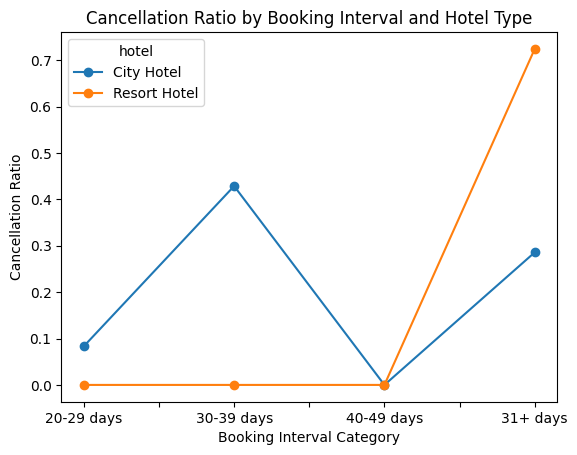

In [87]:
data = grouped_df['cancellation_ratio'].unstack(level=0)
data.plot(kind='line', marker='o')
plt.title('Cancellation Ratio by Booking Interval and Hotel Type')
plt.xlabel('Booking Interval Category')
plt.ylabel('Cancellation Ratio')

plt.show()